In [1]:
import pandas as pd
import numpy as np
#read 'CSV' files 
pm = pd.read_csv("pm.csv",encoding = 'ISO-8859-1',dtype = None)
phi = pd.read_csv("private_health_insurance.csv",encoding = 'ISO-8859-1',dtype = None)
#phi = private health insurance
#slice useful data series from the original data frames
local_code = pd.Series(phi.ix[0:78,3])
local_name = pd.Series(phi.ix[0:78,6])

Ischaemic_heart_disease = pd.Series(pm.ix[0:78,0])

total_death = pd.Series(pm.ix[0:78,1])

lung_cancer = pd.Series(pm.ix[0:78,2])

circulatory_system_disease = pd.Series(pm.ix[0:78,3])

colorectal_cancer = pd.Series(pm.ix[0:78,4])
colorectal_cancer[colorectal_cancer == 'null']='0'

precentage_phi = pd.Series(phi.ix[0:78,0])

#piece the data series together to form a data sets
ivd = pd.DataFrame({'area_code':local_code,'area_name':local_name,'percentage_phi'
                    :precentage_phi.astype(float),'total_death':total_death.astype(float),
                    'lung_cancer':lung_cancer.astype(float),
                    'circulatory_system_disease':circulatory_system_disease.astype(float),
                   'colorectal_cancer':colorectal_cancer.astype(float),'Ischaemic_heart_disease':Ischaemic_heart_disease.astype(float)})
ivd = ivd[['area_code','area_name','percentage_phi','total_death','lung_cancer','circulatory_system_disease','colorectal_cancer','Ischaemic_heart_disease']]

#replace the missing values by mean 
td = ivd['total_death']
tdmean = td.mean()
ivd.loc[td == 0,'total_death'] = tdmean

cc = ivd['colorectal_cancer']
ccmean = cc.mean()
ivd.loc[cc == 0,'colorectal_cancer'] = ccmean

ihd = ivd['Ischaemic_heart_disease']
ihdmean = ihd.mean()
ivd.loc[ihd==0,'Ischaemic_heart_disease'] = ihdmean

ivd



,area_code,area_name,percentage_phi,total_death,lung_cancer,circulatory_system_disease,colorectal_cancer,Ischaemic_heart_disease
0,20110,Alpine (S),39.6,217.737633,23.538941,42.675002,14.557355,25.324568
1,20260,Ararat (RC),36.3,310.710373,25.475705,63.487754,17.342276,28.676790
2,20570,Ballarat (C),38.7,272.713711,20.339705,48.771428,15.526280,24.378532
3,20660,Banyule (C),59.7,197.233979,15.593633,33.873672,9.825818,16.499854
4,20740,Bass Coast (S),34.0,228.854806,18.793348,42.942836,10.426895,21.849796
5,20830,Baw Baw (S),43.7,239.376485,21.205837,40.236151,9.455932,21.535428
6,20910,Bayside (C),70.9,168.155159,12.020570,25.737307,9.220696,11.254516
7,21010,Benalla (RC),39.3,280.072124,29.597261,49.311129,11.667769,25.606004
8,21110,Boroondara (C),71.9,150.961177,11.197649,23.824360,6.638711,13.286631
9,21180,Brimbank (C),32.1,235.887106,20.608209,51.921472,9.976027,25.620079


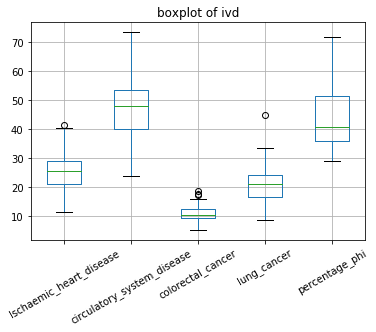

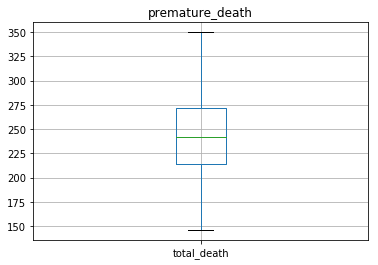

In [2]:
import matplotlib.pyplot as plt

#Find the outliers 
cc = pd.DataFrame({'percentage_phi':ivd['percentage_phi'],'circulatory_system_disease':ivd['circulatory_system_disease'],
                   'lung_cancer':ivd['lung_cancer'],'colorectal_cancer':ivd['colorectal_cancer'],
                  'Ischaemic_heart_disease':ivd['Ischaemic_heart_disease']})

cc.boxplot()
plt.title("boxplot of ivd")
plt.xticks(rotation = 30)
plt.show()


bb = pd.DataFrame({'total_death':ivd['total_death']})
bb.boxplot()
plt.title("premature_death")
plt.show()

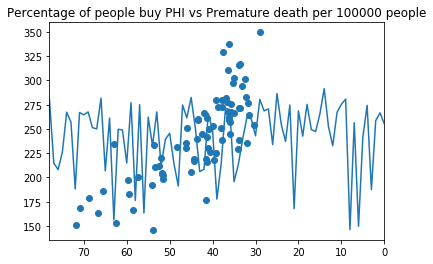

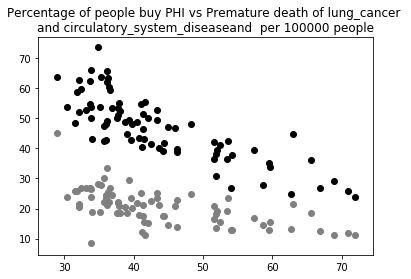

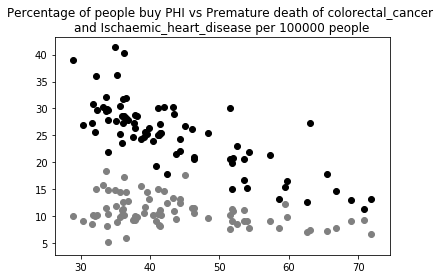

,percentage_phi,total_death,lung_cancer,circulatory_system_disease,colorectal_cancer,Ischaemic_heart_disease,trendline
percentage_phi,1.000000,-0.803354,-0.610705,-0.817255,-0.379750,-0.775890,-1.000000
total_death,-0.803354,1.000000,0.784673,0.860009,0.339638,0.807849,0.803354
lung_cancer,-0.610705,0.784673,1.000000,0.660393,0.081857,0.675011,0.610705
circulatory_system_disease,-0.817255,0.860009,0.660393,1.000000,0.372121,0.906979,0.817255
colorectal_cancer,-0.379750,0.339638,0.081857,0.372121,1.000000,0.399863,0.379750
Ischaemic_heart_disease,-0.775890,0.807849,0.675011,0.906979,0.399863,1.000000,0.775890
trendline,-1.000000,0.803354,0.610705,0.817255,0.379750,0.775890,1.000000


In [3]:
#draw the scatter graph which have percentage_phi as x-axis and premature death rate as y-axis
plt.scatter(ivd['percentage_phi'],ivd['total_death'])
plt.title('Percentage of people buy PHI vs Premature death per 100000 people')
#i tried to draw the trend line, but it failed 
z = np.polyfit(ivd['percentage_phi'], ivd['total_death'], 1)
p = np.poly1d(z)
ivd['trendline'] = p(ivd['percentage_phi'])
ivd.trendline.sort_index(ascending=False).plot()
plt.show()

plt.scatter(ivd['percentage_phi'],ivd['circulatory_system_disease'],color='black')
plt.scatter(ivd['percentage_phi'],ivd['lung_cancer'],color='grey')
plt.title('Percentage of people buy PHI vs Premature death of lung_cancer \nand circulatory_system_diseaseand  per 100000 people')
plt.show()

plt.scatter(ivd['percentage_phi'],ivd['Ischaemic_heart_disease'],color='black')
plt.scatter(ivd['percentage_phi'],ivd['colorectal_cancer'],color = 'grey')
plt.title('Percentage of people buy PHI vs Premature death of colorectal_cancer \nand Ischaemic_heart_disease per 100000 people')
plt.show()

ivd.ix[1:,1:].corr()

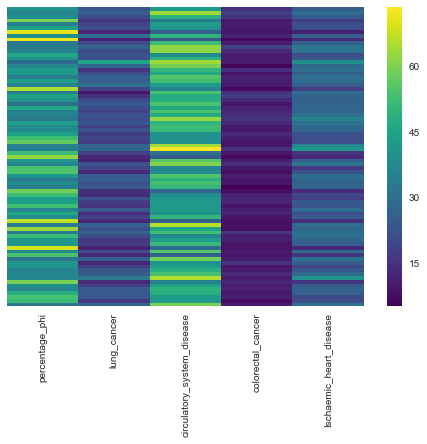

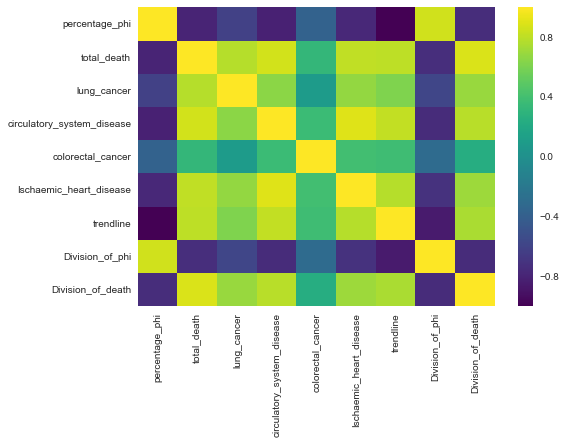

In [5]:
from numpy import arange
import seaborn as sns

#heap map of correlation of different kinds of premature death rate with precentage of people buying private health insurance
vat_picture = ivd[['percentage_phi','lung_cancer','circulatory_system_disease','colorectal_cancer','Ischaemic_heart_disease']]
sns.heatmap(vat_picture,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()

correlation = ivd.corr().ix[1:,1:]
sns.heatmap(correlation,cmap='viridis',xticklabels=True,yticklabels=True,linecolor = 'grey')
plt.show()

In [6]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I

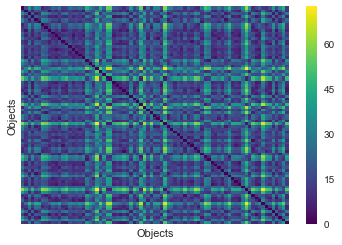

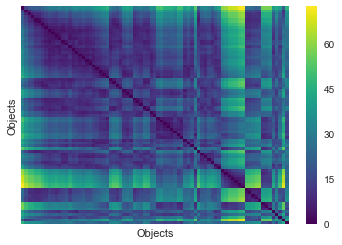

In [7]:
comparing = ivd.ix[:,[2,4,5,6,7]].copy().as_matrix()
np.random.shuffle(comparing)
sq = squareform(pdist(comparing))
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()

#rearrange the heatmap
RV, C, I = VAT(ivd.ix[:,[2,4,5,6,7]])
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

In [8]:
#function of calculating the entropy
def entropy(T):
    H=0
    N=sum(T)
    for i in range(len(T)):
       if T[i]>0: H+=-T[i]/N*np.log2(T[i]/N)
    return H

def mutualInfo(x,y):
    x=(np.asarray(x)).astype(int)
    y=(np.asarray(y)).astype(int)
    assert(len(x)==len(y))
    
    nx=max(x)
    Tx=np.zeros(nx+1)
    for i in range(len(x)):
        Tx[x[i]]+=1.0
    Hx=entropy(Tx)

    ny=max(y)
    Ty=np.zeros(ny+1)
    for i in range(len(y)):
        Ty[y[i]]+=1.0
    Hy=entropy(Ty)
    
    T=np.zeros((nx+1,ny+1))
    for i in range(len(x)):
        T[x[i],y[i]]+=1.0
    Hxy=0
    for i in range(nx+1):
        for j in range(ny+1):
            if T[i,j]>0:  Hxy+=-T[i,j]/len(x)*np.log2(T[i,j]/len(x))
    
    Hxgy=Hxy-Hy
    Hygx=Hxy-Hx
    minH=min(Hx,Hy)
    
    return {'Hx':Hx,'Hy':Hy,'Hx|y': Hxgy , 'Hy|x': Hygx ,'MI':Hx+Hy-Hxy,'NMI':(Hx+Hy-Hxy)/minH} 

In [10]:
#divide the 'percentage_phi' and 'total death" into 3 levels which means low, middle and high. 
#Use 0,1,2 to represent the low, middle and high. 
phi_q1 = ivd['percentage_phi'].quantile(.33)
phi_q3 = ivd['percentage_phi'].quantile(.66)
print(phi_q1,phi_q3)
ivd['Division_of_phi'] = 1
ivd.loc[ivd['percentage_phi']>phi_q1,'Division_of_phi'] = 2
ivd.loc[ivd['percentage_phi']>phi_q3,'Division_of_phi'] = 3

death_q1 = ivd['total_death'].quantile(.33)
death_q3 = ivd['total_death'].quantile(.66)
print(death_q1,death_q3)
ivd['Division_of_death'] = 1
ivd.loc[ivd['total_death']>death_q1,'Division_of_death'] = 2
ivd.loc[ivd['total_death']>death_q3,'Division_of_death'] = 3

ivd


36.574 44.348
223.821029012 261.842948824


,area_code,area_name,percentage_phi,total_death,lung_cancer,circulatory_system_disease,colorectal_cancer,Ischaemic_heart_disease,trendline,Division_of_phi,Division_of_death
0,20110,Alpine (S),39.6,217.737633,23.538941,42.675002,14.557355,25.324568,255.394389,2,1
1,20260,Ararat (RC),36.3,310.710373,25.475705,63.487754,17.342276,28.676790,266.551914,1,3
2,20570,Ballarat (C),38.7,272.713711,20.339705,48.771428,15.526280,24.378532,258.437350,2,3
3,20660,Banyule (C),59.7,197.233979,15.593633,33.873672,9.825818,16.499854,187.434916,3,1
4,20740,Bass Coast (S),34.0,228.854806,18.793348,42.942836,10.426895,21.849796,274.328371,1,2
5,20830,Baw Baw (S),43.7,239.376485,21.205837,40.236151,9.455932,21.535428,241.532009,2,2
6,20910,Bayside (C),70.9,168.155159,12.020570,25.737307,9.220696,11.254516,149.566951,3,1
7,21010,Benalla (RC),39.3,280.072124,29.597261,49.311129,11.667769,25.606004,256.408709,2,3
8,21110,Boroondara (C),71.9,150.961177,11.197649,23.824360,6.638711,13.286631,146.185883,3,1
9,21180,Brimbank (C),32.1,235.887106,20.608209,51.921472,9.976027,25.620079,280.752401,1,2


In [14]:
#calculate matual informations about dicision of phi and division of death. 
newd= ivd.ix[:,[9,10]]
newd
result=mutualInfo(newd.loc[:,'Division_of_phi'],newd.loc[:,'Division_of_death'])

print(result)


{'Hx': 1.5847322937245658, 'Hy': 1.5847322937245658, 'Hx|y': 1.0250496582147743, 'Hy|x': 1.0250496582147743, 'MI': 0.55968263550979147, 'NMI': 0.35317172353090637}


In [15]:
#try to use desicion tree and knn to find out the classification
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

#use the different premature death rate to make decision 
data = ivd[['total_death','lung_cancer','circulatory_system_disease','colorectal_cancer','Ischaemic_heart_disease']]
#set division of phi as label
classlabel=ivd['Division_of_phi']
#use two-thirds of data as training set, the rest data are testing set
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\huang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
#choose the 5 nearest neighbours

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.407407407407


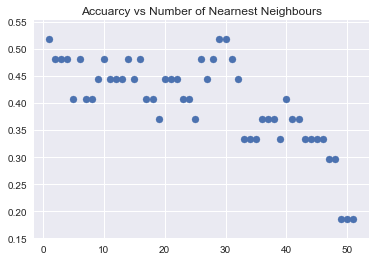

In [18]:
#visualization of how is the accuarcy going to change if change the number of nearest neighbour
ks = range(1,52)
accuracies=[]
for k in ks:
   knn = neighbors.KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train) 
   y_pred=knn.predict(X_test)
   accuracies.append(accuracy_score(y_test, y_pred))

plt.scatter(ks,accuracies)
plt.title('Accuarcy vs Number of Nearnest Neighbours')
plt.show()